In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Flatten
from keras.models import load_model
from keras import backend as K
import math, time
import itertools
from math import sqrt

C:\Users\ASUS\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('coba.csv', header=0, parse_dates=['Date'], index_col='Date', squeeze=True)

In [3]:
df

,suhu,kelembaban,matahari
Date,,,
2010-01-01,27.2,83,5.3
2010-02-01,27.3,84,5.2
2010-03-01,28.5,82,4.3
2010-04-01,27.7,84,7.0
2010-05-01,26.9,85,4.6
2010-06-01,26.7,87,4.5
2010-07-01,26.3,85,3.3
2010-08-01,26.1,84,1.8
2010-09-01,25.7,87,2.4


In [4]:
hasil = df.replace({'suhu' : 9999, 'kelembaban':9999, 'matahari':9999}, np.nan)

In [5]:
hasil.describe()

,suhu,kelembaban,matahari
count,362.000000,362.000000,362.000000
mean,27.390884,82.223757,4.364917
std,0.858589,4.970516,2.391365
min,25.000000,60.000000,0.000000
25%,26.800000,79.000000,2.500000
50%,27.400000,82.000000,4.600000
75%,28.000000,86.000000,6.300000
max,29.500000,94.000000,8.000000


In [6]:
hasil.isnull().sum()

suhu          0
kelembaban    0
matahari      0
dtype: int64

In [7]:
hasil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2010-01-01 to 2010-12-28
Data columns (total 3 columns):
suhu          362 non-null float64
kelembaban    362 non-null int64
matahari      362 non-null float64
dtypes: float64(2), int64(1)
memory usage: 11.3 KB


In [8]:
interpolated = hasil.interpolate()

In [9]:
interpolated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2010-01-01 to 2010-12-28
Data columns (total 3 columns):
suhu          362 non-null float64
kelembaban    362 non-null int64
matahari      362 non-null float64
dtypes: float64(2), int64(1)
memory usage: 11.3 KB


In [10]:
data_uji = interpolated.copy()

In [11]:
print(data_uji)

            suhu  kelembaban  matahari
Date                                  
2010-01-01  27.2          83       5.3
2010-02-01  27.3          84       5.2
2010-03-01  28.5          82       4.3
2010-04-01  27.7          84       7.0
2010-05-01  26.9          85       4.6
2010-06-01  26.7          87       4.5
2010-07-01  26.3          85       3.3
2010-08-01  26.1          84       1.8
2010-09-01  25.7          87       2.4
2010-10-01  26.2          87       0.0
2010-11-01  26.8          86       0.5
2010-12-01  27.1          89       3.9
2010-01-13  26.0          86       1.3
2010-01-14  26.2          82       2.7
2010-01-15  26.3          83       3.5
2010-01-16  26.5          84       0.3
2010-01-17  25.8          86       0.5
2010-01-18  27.0          84       4.8
2010-01-19  25.4          90       5.8
2010-01-20  26.2          86       0.0
2010-01-21  26.5          85       3.3
2010-01-22  26.1          89       2.1
2010-01-23  25.8          87       3.0
2010-01-24  26.5         

In [12]:
def days(dl):
    if dl < 2 : return '0'
    elif 2 < dl < 4 :return '1'
    elif 4 < dl < 6 :return '2'
    elif 6 < dl < 8 :return '3'
    else: return '4'
interpolated['quantile'] = interpolated['matahari'].map(days) 

In [13]:
data_uji

,suhu,kelembaban,matahari
Date,,,
2010-01-01,27.2,83,5.3
2010-02-01,27.3,84,5.2
2010-03-01,28.5,82,4.3
2010-04-01,27.7,84,7.0
2010-05-01,26.9,85,4.6
2010-06-01,26.7,87,4.5
2010-07-01,26.3,85,3.3
2010-08-01,26.1,84,1.8
2010-09-01,25.7,87,2.4


In [14]:
data_uji['quantile'] = data_uji['matahari'].map(days)
data_uji

,suhu,kelembaban,matahari,quantile
Date,,,,
2010-01-01,27.2,83,5.3,2
2010-02-01,27.3,84,5.2,2
2010-03-01,28.5,82,4.3,2
2010-04-01,27.7,84,7.0,3
2010-05-01,26.9,85,4.6,2
2010-06-01,26.7,87,4.5,2
2010-07-01,26.3,85,3.3,1
2010-08-01,26.1,84,1.8,0
2010-09-01,25.7,87,2.4,1


In [15]:
#Data Preprocessing
data=data_uji.copy()

In [16]:
MinMax_scaler = preprocessing.MinMaxScaler()
data['suhu'] = MinMax_scaler.fit_transform(data['suhu'].values.reshape(-1,1))
data['kelembaban'] = MinMax_scaler.fit_transform(data['kelembaban'].values.reshape(-1,1))
data['matahari'] = MinMax_scaler.fit_transform(data['matahari'].values.reshape(-1,1))
#data['matahari'] = round(data['matahari'], 1)*10
print(data)

                suhu  kelembaban  matahari quantile
Date                                               
2010-01-01  0.488889    0.676471    0.6625        2
2010-02-01  0.511111    0.705882    0.6500        2
2010-03-01  0.777778    0.647059    0.5375        2
2010-04-01  0.600000    0.705882    0.8750        3
2010-05-01  0.422222    0.735294    0.5750        2
2010-06-01  0.377778    0.794118    0.5625        2
2010-07-01  0.288889    0.735294    0.4125        1
2010-08-01  0.244444    0.705882    0.2250        0
2010-09-01  0.155556    0.794118    0.3000        1
2010-10-01  0.266667    0.794118    0.0000        0
2010-11-01  0.400000    0.764706    0.0625        0
2010-12-01  0.466667    0.852941    0.4875        1
2010-01-13  0.222222    0.764706    0.1625        0
2010-01-14  0.266667    0.647059    0.3375        1
2010-01-15  0.288889    0.676471    0.4375        1
2010-01-16  0.333333    0.705882    0.0375        0
2010-01-17  0.177778    0.764706    0.0625        0
2010-01-18  

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [17]:
print(data)

                suhu  kelembaban  matahari quantile
Date                                               
2010-01-01  0.488889    0.676471    0.6625        2
2010-02-01  0.511111    0.705882    0.6500        2
2010-03-01  0.777778    0.647059    0.5375        2
2010-04-01  0.600000    0.705882    0.8750        3
2010-05-01  0.422222    0.735294    0.5750        2
2010-06-01  0.377778    0.794118    0.5625        2
2010-07-01  0.288889    0.735294    0.4125        1
2010-08-01  0.244444    0.705882    0.2250        0
2010-09-01  0.155556    0.794118    0.3000        1
2010-10-01  0.266667    0.794118    0.0000        0
2010-11-01  0.400000    0.764706    0.0625        0
2010-12-01  0.466667    0.852941    0.4875        1
2010-01-13  0.222222    0.764706    0.1625        0
2010-01-14  0.266667    0.647059    0.3375        1
2010-01-15  0.288889    0.676471    0.4375        1
2010-01-16  0.333333    0.705882    0.0375        0
2010-01-17  0.177778    0.764706    0.0625        0
2010-01-18  

In [18]:
##Split Data to training set and test set
data = data.as_matrix()
df = []
for index in range(len(data) - 12):
    df.append(data[index: index + 13])
df = np.array(df)

In [19]:
print(data)

[[0.48888888888888893 0.6764705882352939 0.6625 '2']
 [0.5111111111111111 0.7058823529411766 0.65 '2']
 [0.7777777777777777 0.6470588235294117 0.5375 '2']
 ...
 [0.1999999999999993 0.7941176470588234 0.5 '4']
 [0.44444444444444464 0.7058823529411766 0.575 '2']
 [0.4222222222222216 0.6470588235294117 0.7 '2']]


In [20]:
splitRow = round(0.8 * interpolated.shape[0])

## Training (90%)
train = df[:int(splitRow), :]
X_train = train[:, :-1] # all data until day 30
y_train = train[:, -1][:,-1] # day 31 wind speed
print('Training set:', train.shape[0], 'obs')

## Test (10%)
test = df[int(splitRow):, :]
X_test = test[:, :-1] # all data until day 30
y_test = test[:, -1][:,-1] # wind speed
print('Test set:', test.shape[0], 'obs')


Training set: 290 obs
Test set: 60 obs


In [21]:
X_train[0]

array([[0.48888888888888893, 0.6764705882352939, 0.6625, '2'],
       [0.5111111111111111, 0.7058823529411766, 0.65, '2'],
       [0.7777777777777777, 0.6470588235294117, 0.5375, '2'],
       [0.5999999999999996, 0.7058823529411766, 0.875, '3'],
       [0.4222222222222216, 0.7352941176470589, 0.575, '2'],
       [0.3777777777777773, 0.7941176470588234, 0.5625, '2'],
       [0.28888888888888875, 0.7352941176470589, 0.4125, '1'],
       [0.24444444444444446, 0.7058823529411766, 0.225, '0'],
       [0.155555555555555, 0.7941176470588234, 0.3, '1'],
       [0.2666666666666666, 0.7941176470588234, 0.0, '0'],
       [0.40000000000000036, 0.7647058823529411, 0.0625, '0'],
       [0.4666666666666668, 0.8529411764705883, 0.4875, '1']],
      dtype=object)

In [22]:
y_train[2]

'1'

In [23]:
for i in range(len(y_train)):
    print("data",df[i])
    print(y_train[i])

data [[0.48888888888888893 0.6764705882352939 0.6625 '2']
 [0.5111111111111111 0.7058823529411766 0.65 '2']
 [0.7777777777777777 0.6470588235294117 0.5375 '2']
 [0.5999999999999996 0.7058823529411766 0.875 '3']
 [0.4222222222222216 0.7352941176470589 0.575 '2']
 [0.3777777777777773 0.7941176470588234 0.5625 '2']
 [0.28888888888888875 0.7352941176470589 0.4125 '1']
 [0.24444444444444446 0.7058823529411766 0.225 '0']
 [0.155555555555555 0.7941176470588234 0.3 '1']
 [0.2666666666666666 0.7941176470588234 0.0 '0']
 [0.40000000000000036 0.7647058823529411 0.0625 '0']
 [0.4666666666666668 0.8529411764705883 0.4875 '1']
 [0.22222222222222232 0.7647058823529411 0.1625 '0']]
0
data [[0.5111111111111111 0.7058823529411766 0.65 '2']
 [0.7777777777777777 0.6470588235294117 0.5375 '2']
 [0.5999999999999996 0.7058823529411766 0.875 '3']
 [0.4222222222222216 0.7352941176470589 0.575 '2']
 [0.3777777777777773 0.7941176470588234 0.5625 '2']
 [0.28888888888888875 0.7352941176470589 0.4125 '1']
 [0.24444

In [24]:
#Model Komputasi
neurons = [64, 64, 32, 1]
shape = [30, 3, 1]
dropout = 0.2
decay = 0.2
epochs = 100

In [25]:
X_train.shape

(290, 12, 4)

In [26]:
# define model
model = Sequential()
#1dCNN1
#size 36*1
model.add(Conv1D(filters=64, kernel_size=2, strides=1,
            padding='valid', activation='relu', 
        input_shape=(12,4)))
#pooling
model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid'))
#size 18*8

#1dCNN2
model.add(Conv1D(filters=64, kernel_size=2, strides=1,
            padding='valid', activation='relu'))
#pooling
model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid'))
#size 9*16

#1dCNN3
#size 9*16
model.add(Conv1D(filters=64, kernel_size=2, strides=1,
            padding='same', activation='relu'))
#pooling
model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid'))
#size 4*32

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))


In [27]:
#Compile Networks
model.compile(loss='mse',optimizer='adam', metrics=['accuracy','categorical_accuracy'])

In [28]:
#Train Networks
history = model.fit(X_train, y_train, batch_size = 256, epochs = 500, validation_split=0.2, verbose=1)

Train on 232 samples, validate on 58 samples
Epoch 1/500
232/232 [==============================] - 62s 266ms/step - loss: 4.0589 - acc: 0.1767 - categorical_accuracy: 1.0000 - val_loss: 3.0712 - val_acc: 0.1897 - val_categorical_accuracy: 1.0000
Epoch 2/500
232/232 [==============================] - 0s 957us/step - loss: 3.9191 - acc: 0.1810 - categorical_accuracy: 1.0000 - val_loss: 2.9597 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 3/500
232/232 [==============================] - 0s 95us/step - loss: 3.7809 - acc: 0.1595 - categorical_accuracy: 1.0000 - val_loss: 2.8514 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 4/500
232/232 [==============================] - 0s 36us/step - loss: 3.6685 - acc: 0.1724 - categorical_accuracy: 1.0000 - val_loss: 2.7579 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 5/500
232/232 [==============================] - 0s 82us/step - loss: 3.5480 - acc: 0.1638 - categorical_accuracy: 1.0000 - val_loss: 2.6760 - val

Epoch 42/500
232/232 [==============================] - 0s 95us/step - loss: 2.6251 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 43/500
232/232 [==============================] - 0s 47us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 44/500
232/232 [==============================] - 0s 75us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 45/500
232/232 [==============================] - 0s 70us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 46/500
232/232 [==============================] - 0s 73us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.

Epoch 83/500
232/232 [==============================] - 0s 68us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 84/500
232/232 [==============================] - 0s 75us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 85/500
232/232 [==============================] - 0s 74us/step - loss: 2.6251 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 86/500
232/232 [==============================] - 0s 74us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 87/500
232/232 [==============================] - 0s 74us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.

Epoch 124/500
232/232 [==============================] - 0s 65us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 125/500
232/232 [==============================] - 0s 89us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 126/500
232/232 [==============================] - 0s 56us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 127/500
232/232 [==============================] - 0s 81us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 128/500
232/232 [==============================] - 0s 78us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accurac

Epoch 165/500
232/232 [==============================] - 0s 86us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 166/500
232/232 [==============================] - 0s 73us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 167/500
232/232 [==============================] - 0s 73us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 168/500
232/232 [==============================] - 0s 68us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 169/500
232/232 [==============================] - 0s 71us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accurac

Epoch 206/500
232/232 [==============================] - 0s 69us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 207/500
232/232 [==============================] - 0s 77us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 208/500
232/232 [==============================] - 0s 71us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 209/500
232/232 [==============================] - 0s 73us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 210/500
232/232 [==============================] - 0s 73us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accurac

Epoch 247/500
232/232 [==============================] - 0s 67us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 248/500
232/232 [==============================] - 0s 26us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 249/500
232/232 [==============================] - 0s 121us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 250/500
232/232 [==============================] - 0s 44us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 251/500
232/232 [==============================] - 0s 59us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accura

Epoch 288/500
232/232 [==============================] - 0s 87us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 289/500
232/232 [==============================] - 0s 70us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 290/500
232/232 [==============================] - 0s 61us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 291/500
232/232 [==============================] - 0s 85us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 292/500
232/232 [==============================] - 0s 74us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accurac

Epoch 329/500
232/232 [==============================] - 0s 60us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 330/500
232/232 [==============================] - 0s 85us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 331/500
232/232 [==============================] - 0s 104us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 332/500
232/232 [==============================] - 0s 66us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 333/500
232/232 [==============================] - 0s 43us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accura

Epoch 370/500
232/232 [==============================] - 0s 73us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 371/500
232/232 [==============================] - 0s 73us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 372/500
232/232 [==============================] - 0s 112us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 373/500
232/232 [==============================] - 0s 34us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 374/500
232/232 [==============================] - 0s 72us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accura

Epoch 411/500
232/232 [==============================] - 0s 63us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 412/500
232/232 [==============================] - 0s 72us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 413/500
232/232 [==============================] - 0s 81us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 414/500
232/232 [==============================] - 0s 58us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 415/500
232/232 [==============================] - 0s 79us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accurac

Epoch 452/500
232/232 [==============================] - 0s 81us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 453/500
232/232 [==============================] - 0s 63us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 454/500
232/232 [==============================] - 0s 86us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 455/500
232/232 [==============================] - 0s 59us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 456/500
232/232 [==============================] - 0s 117us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accura

Epoch 493/500
232/232 [==============================] - 0s 77us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 494/500
232/232 [==============================] - 0s 73us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 495/500
232/232 [==============================] - 0s 69us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 496/500
232/232 [==============================] - 0s 69us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 497/500
232/232 [==============================] - 0s 69us/step - loss: 2.6250 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 2.0172 - val_acc: 0.2241 - val_categorical_accurac

In [29]:
##Evaluate Model
mse , acc, cc = model.evaluate(X_train, y_train)
print("mean square error = ", mse)

290/290 [==============================] - 0s 618us/step
mean square error =  2.5034493142160876


In [30]:
acc

0.1793103448275862

In [31]:
# define model
model = Sequential()
#1dCNN1
#size 36*1
model.add(Conv1D(filters=64, kernel_size=2, strides=1,
            padding='valid', activation='relu', 
        input_shape=(12,4)))
#pooling
model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid'))
#size 18*8

#1dCNN2
model.add(Conv1D(filters=64, kernel_size=2, strides=1,
            padding='valid', activation='relu'))
#pooling
model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid'))
#size 9*16

#1dCNN3
#size 9*16
model.add(Conv1D(filters=64, kernel_size=2, strides=1,
            padding='same', activation='relu'))
#pooling
model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid'))
#size 4*32

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(1))

In [32]:
#Compile Networks
model.compile(loss='mse',optimizer='sgd', metrics=['accuracy','categorical_accuracy'])

In [33]:
#Train Networks
history2 = model.fit(X_train, y_train, batch_size = 256, epochs = 500, validation_split=0.2, verbose=1)

Train on 232 samples, validate on 58 samples
Epoch 1/500
232/232 [==============================] - 1s 4ms/step - loss: 6.5082 - acc: 0.1638 - categorical_accuracy: 1.0000 - val_loss: 3.8294 - val_acc: 0.1897 - val_categorical_accuracy: 1.0000
Epoch 2/500
232/232 [==============================] - 0s 68us/step - loss: 4.7998 - acc: 0.1638 - categorical_accuracy: 1.0000 - val_loss: 2.8787 - val_acc: 0.2069 - val_categorical_accuracy: 1.0000
Epoch 3/500
232/232 [==============================] - 0s 79us/step - loss: 3.7644 - acc: 0.1940 - categorical_accuracy: 1.0000 - val_loss: 2.1012 - val_acc: 0.2241 - val_categorical_accuracy: 1.0000
Epoch 4/500
232/232 [==============================] - 0s 71us/step - loss: 2.7455 - acc: 0.1767 - categorical_accuracy: 1.0000 - val_loss: 1.5808 - val_acc: 0.2414 - val_categorical_accuracy: 1.0000
Epoch 5/500
232/232 [==============================] - 0s 64us/step - loss: 2.1436 - acc: 0.1681 - categorical_accuracy: 1.0000 - val_loss: 1.4026 - val_acc

Epoch 42/500
232/232 [==============================] - 0s 66us/step - loss: 1.5200 - acc: 0.2845 - categorical_accuracy: 1.0000 - val_loss: 1.4577 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 43/500
232/232 [==============================] - 0s 69us/step - loss: 1.5687 - acc: 0.2931 - categorical_accuracy: 1.0000 - val_loss: 1.4420 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 44/500
232/232 [==============================] - 0s 64us/step - loss: 1.5401 - acc: 0.2759 - categorical_accuracy: 1.0000 - val_loss: 1.4525 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 45/500
232/232 [==============================] - 0s 64us/step - loss: 1.5828 - acc: 0.2845 - categorical_accuracy: 1.0000 - val_loss: 1.4406 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 46/500
232/232 [==============================] - 0s 65us/step - loss: 1.6215 - acc: 0.2802 - categorical_accuracy: 1.0000 - val_loss: 1.4492 - val_acc: 0.2586 - val_categorical_accuracy: 1.

Epoch 83/500
232/232 [==============================] - 0s 64us/step - loss: 1.5574 - acc: 0.2716 - categorical_accuracy: 1.0000 - val_loss: 1.4583 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 84/500
232/232 [==============================] - 0s 69us/step - loss: 1.5236 - acc: 0.2802 - categorical_accuracy: 1.0000 - val_loss: 1.4565 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 85/500
232/232 [==============================] - 0s 69us/step - loss: 1.5547 - acc: 0.2845 - categorical_accuracy: 1.0000 - val_loss: 1.4504 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 86/500
232/232 [==============================] - 0s 65us/step - loss: 1.5741 - acc: 0.2802 - categorical_accuracy: 1.0000 - val_loss: 1.4384 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 87/500
232/232 [==============================] - 0s 66us/step - loss: 1.6137 - acc: 0.2845 - categorical_accuracy: 1.0000 - val_loss: 1.4530 - val_acc: 0.2586 - val_categorical_accuracy: 1.

Epoch 124/500
232/232 [==============================] - 0s 35us/step - loss: 1.5786 - acc: 0.2845 - categorical_accuracy: 1.0000 - val_loss: 1.4626 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 125/500
232/232 [==============================] - 0s 78us/step - loss: 1.5451 - acc: 0.2457 - categorical_accuracy: 1.0000 - val_loss: 1.4726 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 126/500
232/232 [==============================] - 0s 66us/step - loss: 1.5567 - acc: 0.2845 - categorical_accuracy: 1.0000 - val_loss: 1.4651 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 127/500
232/232 [==============================] - 0s 66us/step - loss: 1.5670 - acc: 0.2802 - categorical_accuracy: 1.0000 - val_loss: 1.4656 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 128/500
232/232 [==============================] - 0s 63us/step - loss: 1.5279 - acc: 0.2888 - categorical_accuracy: 1.0000 - val_loss: 1.4704 - val_acc: 0.2586 - val_categorical_accurac

Epoch 165/500
232/232 [==============================] - 0s 65us/step - loss: 1.5166 - acc: 0.3060 - categorical_accuracy: 1.0000 - val_loss: 1.4846 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 166/500
232/232 [==============================] - 0s 70us/step - loss: 1.4862 - acc: 0.3017 - categorical_accuracy: 1.0000 - val_loss: 1.4920 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 167/500
232/232 [==============================] - 0s 72us/step - loss: 1.5309 - acc: 0.3060 - categorical_accuracy: 1.0000 - val_loss: 1.4936 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 168/500
232/232 [==============================] - 0s 68us/step - loss: 1.4816 - acc: 0.2586 - categorical_accuracy: 1.0000 - val_loss: 1.5025 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 169/500
232/232 [==============================] - 0s 56us/step - loss: 1.5061 - acc: 0.3017 - categorical_accuracy: 1.0000 - val_loss: 1.5023 - val_acc: 0.2586 - val_categorical_accurac

Epoch 206/500
232/232 [==============================] - 0s 69us/step - loss: 1.4988 - acc: 0.2672 - categorical_accuracy: 1.0000 - val_loss: 1.5077 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 207/500
232/232 [==============================] - 0s 70us/step - loss: 1.5084 - acc: 0.3060 - categorical_accuracy: 1.0000 - val_loss: 1.4916 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 208/500
232/232 [==============================] - 0s 67us/step - loss: 1.5040 - acc: 0.3190 - categorical_accuracy: 1.0000 - val_loss: 1.5071 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 209/500
232/232 [==============================] - 0s 74us/step - loss: 1.5098 - acc: 0.2802 - categorical_accuracy: 1.0000 - val_loss: 1.4932 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 210/500
232/232 [==============================] - 0s 62us/step - loss: 1.5062 - acc: 0.2759 - categorical_accuracy: 1.0000 - val_loss: 1.5034 - val_acc: 0.2586 - val_categorical_accurac

Epoch 247/500
232/232 [==============================] - 0s 72us/step - loss: 1.4848 - acc: 0.3060 - categorical_accuracy: 1.0000 - val_loss: 1.5109 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 248/500
232/232 [==============================] - 0s 53us/step - loss: 1.4758 - acc: 0.3190 - categorical_accuracy: 1.0000 - val_loss: 1.5359 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 249/500
232/232 [==============================] - 0s 76us/step - loss: 1.4701 - acc: 0.3103 - categorical_accuracy: 1.0000 - val_loss: 1.5209 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 250/500
232/232 [==============================] - 0s 73us/step - loss: 1.4631 - acc: 0.3276 - categorical_accuracy: 1.0000 - val_loss: 1.5229 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 251/500
232/232 [==============================] - 0s 69us/step - loss: 1.4056 - acc: 0.3103 - categorical_accuracy: 1.0000 - val_loss: 1.5378 - val_acc: 0.2586 - val_categorical_accurac

Epoch 288/500
232/232 [==============================] - 0s 58us/step - loss: 1.3875 - acc: 0.2974 - categorical_accuracy: 1.0000 - val_loss: 1.5355 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 289/500
232/232 [==============================] - 0s 75us/step - loss: 1.4250 - acc: 0.3190 - categorical_accuracy: 1.0000 - val_loss: 1.5439 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 290/500
232/232 [==============================] - 0s 98us/step - loss: 1.4554 - acc: 0.2931 - categorical_accuracy: 1.0000 - val_loss: 1.5322 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 291/500
232/232 [==============================] - 0s 45us/step - loss: 1.4119 - acc: 0.3060 - categorical_accuracy: 1.0000 - val_loss: 1.5503 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 292/500
232/232 [==============================] - 0s 53us/step - loss: 1.4516 - acc: 0.2888 - categorical_accuracy: 1.0000 - val_loss: 1.5368 - val_acc: 0.2586 - val_categorical_accurac

Epoch 329/500
232/232 [==============================] - 0s 67us/step - loss: 1.3721 - acc: 0.3103 - categorical_accuracy: 1.0000 - val_loss: 1.5740 - val_acc: 0.2414 - val_categorical_accuracy: 1.0000
Epoch 330/500
232/232 [==============================] - 0s 67us/step - loss: 1.3982 - acc: 0.3276 - categorical_accuracy: 1.0000 - val_loss: 1.5475 - val_acc: 0.2414 - val_categorical_accuracy: 1.0000
Epoch 331/500
232/232 [==============================] - 0s 67us/step - loss: 1.3402 - acc: 0.3017 - categorical_accuracy: 1.0000 - val_loss: 1.5795 - val_acc: 0.2586 - val_categorical_accuracy: 1.0000
Epoch 332/500
232/232 [==============================] - 0s 57us/step - loss: 1.3271 - acc: 0.3017 - categorical_accuracy: 1.0000 - val_loss: 1.5596 - val_acc: 0.2414 - val_categorical_accuracy: 1.0000
Epoch 333/500
232/232 [==============================] - 0s 81us/step - loss: 1.4099 - acc: 0.3060 - categorical_accuracy: 1.0000 - val_loss: 1.5658 - val_acc: 0.2414 - val_categorical_accurac

Epoch 370/500
232/232 [==============================] - 0s 64us/step - loss: 1.3972 - acc: 0.3017 - categorical_accuracy: 1.0000 - val_loss: 1.5513 - val_acc: 0.2414 - val_categorical_accuracy: 1.0000
Epoch 371/500
232/232 [==============================] - 0s 60us/step - loss: 1.3666 - acc: 0.2931 - categorical_accuracy: 1.0000 - val_loss: 1.6271 - val_acc: 0.2931 - val_categorical_accuracy: 1.0000
Epoch 372/500
232/232 [==============================] - 0s 66us/step - loss: 1.3874 - acc: 0.3017 - categorical_accuracy: 1.0000 - val_loss: 1.5507 - val_acc: 0.2414 - val_categorical_accuracy: 1.0000
Epoch 373/500
232/232 [==============================] - 0s 69us/step - loss: 1.3865 - acc: 0.3060 - categorical_accuracy: 1.0000 - val_loss: 1.6069 - val_acc: 0.2759 - val_categorical_accuracy: 1.0000
Epoch 374/500
232/232 [==============================] - 0s 69us/step - loss: 1.3738 - acc: 0.3017 - categorical_accuracy: 1.0000 - val_loss: 1.5739 - val_acc: 0.2414 - val_categorical_accurac

Epoch 411/500
232/232 [==============================] - 0s 62us/step - loss: 1.2871 - acc: 0.3103 - categorical_accuracy: 1.0000 - val_loss: 1.6819 - val_acc: 0.2931 - val_categorical_accuracy: 1.0000
Epoch 412/500
232/232 [==============================] - 0s 31us/step - loss: 1.3502 - acc: 0.2802 - categorical_accuracy: 1.0000 - val_loss: 1.5711 - val_acc: 0.2069 - val_categorical_accuracy: 1.0000
Epoch 413/500
232/232 [==============================] - 0s 62us/step - loss: 1.2911 - acc: 0.2974 - categorical_accuracy: 1.0000 - val_loss: 1.6532 - val_acc: 0.2931 - val_categorical_accuracy: 1.0000
Epoch 414/500
232/232 [==============================] - 0s 102us/step - loss: 1.3057 - acc: 0.3319 - categorical_accuracy: 1.0000 - val_loss: 1.5839 - val_acc: 0.2069 - val_categorical_accuracy: 1.0000
Epoch 415/500
232/232 [==============================] - 0s 64us/step - loss: 1.3322 - acc: 0.2931 - categorical_accuracy: 1.0000 - val_loss: 1.6850 - val_acc: 0.2931 - val_categorical_accura

Epoch 452/500
232/232 [==============================] - 0s 68us/step - loss: 1.3248 - acc: 0.3017 - categorical_accuracy: 1.0000 - val_loss: 1.5743 - val_acc: 0.2069 - val_categorical_accuracy: 1.0000
Epoch 453/500
232/232 [==============================] - 0s 68us/step - loss: 1.3307 - acc: 0.2716 - categorical_accuracy: 1.0000 - val_loss: 1.8319 - val_acc: 0.3103 - val_categorical_accuracy: 1.0000
Epoch 454/500
232/232 [==============================] - 0s 66us/step - loss: 1.3731 - acc: 0.3362 - categorical_accuracy: 1.0000 - val_loss: 1.5773 - val_acc: 0.2069 - val_categorical_accuracy: 1.0000
Epoch 455/500
232/232 [==============================] - 0s 70us/step - loss: 1.2948 - acc: 0.3017 - categorical_accuracy: 1.0000 - val_loss: 1.8231 - val_acc: 0.2759 - val_categorical_accuracy: 1.0000
Epoch 456/500
232/232 [==============================] - 0s 51us/step - loss: 1.3089 - acc: 0.3233 - categorical_accuracy: 1.0000 - val_loss: 1.5786 - val_acc: 0.2069 - val_categorical_accurac

Epoch 493/500
232/232 [==============================] - 0s 42us/step - loss: 1.2419 - acc: 0.3147 - categorical_accuracy: 1.0000 - val_loss: 1.7548 - val_acc: 0.2931 - val_categorical_accuracy: 1.0000
Epoch 494/500
232/232 [==============================] - 0s 56us/step - loss: 1.2809 - acc: 0.3103 - categorical_accuracy: 1.0000 - val_loss: 1.6188 - val_acc: 0.2069 - val_categorical_accuracy: 1.0000
Epoch 495/500
232/232 [==============================] - 0s 80us/step - loss: 1.3015 - acc: 0.3233 - categorical_accuracy: 1.0000 - val_loss: 1.7971 - val_acc: 0.2931 - val_categorical_accuracy: 1.0000
Epoch 496/500
232/232 [==============================] - 0s 54us/step - loss: 1.2585 - acc: 0.3233 - categorical_accuracy: 1.0000 - val_loss: 1.6174 - val_acc: 0.1897 - val_categorical_accuracy: 1.0000
Epoch 497/500
232/232 [==============================] - 0s 77us/step - loss: 1.2559 - acc: 0.3147 - categorical_accuracy: 1.0000 - val_loss: 1.8190 - val_acc: 0.2931 - val_categorical_accurac

In [34]:
##Evaluate Model
mse , acc, cc = model.evaluate(X_train, y_train)
print("mean square error = ", mse)

290/290 [==============================] - 0s 61us/step
mean square error =  1.3128591340163658


In [35]:
acc

0.2793103448275862

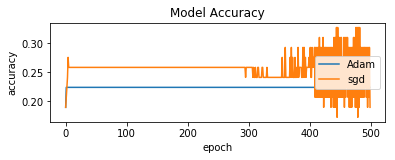

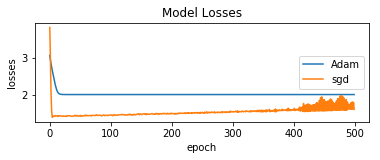

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 11, 64)            576       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 4, 64)             8256      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 2, 64)             8256      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
__________

In [36]:
#sumarize history for accuracy
plt.subplot(211)
#plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_acc'])
#plt.plot(history2.history['categorical_accuracy'])
plt.plot(history2.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Adam','sgd'],loc='center right')
plt.show()

#sumarize history for losses
plt.subplot(212)
#plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Losses')
plt.ylabel('losses')
plt.xlabel('epoch')
plt.legend(['Adam','sgd'],loc='center right')
plt.show()

print(model.summary())

In [37]:
acc

0.2793103448275862

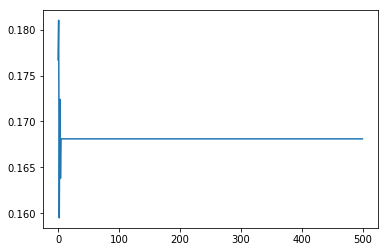

290/290 [==============================] - 0s 87us/step


NameError: name 'loss' is not defined

In [38]:
plt.plot(history.history['acc'])
plt.show()##Evaluate Model
mse , acc, cc = model.evaluate(X_train, y_train)
print("mean square error = ", loss)

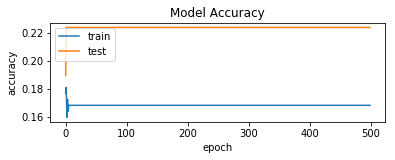

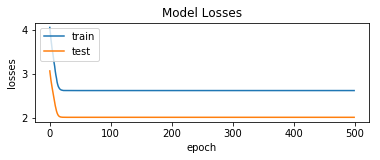

In [39]:
#sumarize history for accuracy
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

#sumarize history for losses
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Losses')
plt.ylabel('losses')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()